### AdaBoost 与 决策树模型的比较

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import zero_one_loss
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

In [2]:
# 设置迭代次数
n_estimators = 200

In [3]:
# 使用
X, y = datasets.make_hastie_10_2(n_samples=12000, random_state=1)

In [4]:
# 从12000个数据中取前2000行作为测试集，其余作为训练集
train_x, train_y = X[2000:], y[2000:]
test_x, test_y = X[:2000], y[:2000]

In [5]:
# 弱分类器
dt_stump = DecisionTreeClassifier(max_depth=1, min_samples_leaf=1)
dt_stump.fit(train_x, train_y)
dt_stump_err = 1.0 - dt_stump.score(test_x, test_y)

In [6]:
# 决策树分类器
dt = DecisionTreeClassifier()
dt.fit(train_x, train_y)
dt_err = 1.0 - dt.score(test_x, test_y)

In [7]:
# AdaBoost分类器
ada = AdaBoostClassifier(base_estimator=dt_stump, n_estimators=n_estimators)
ada.fit(train_x, train_y)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

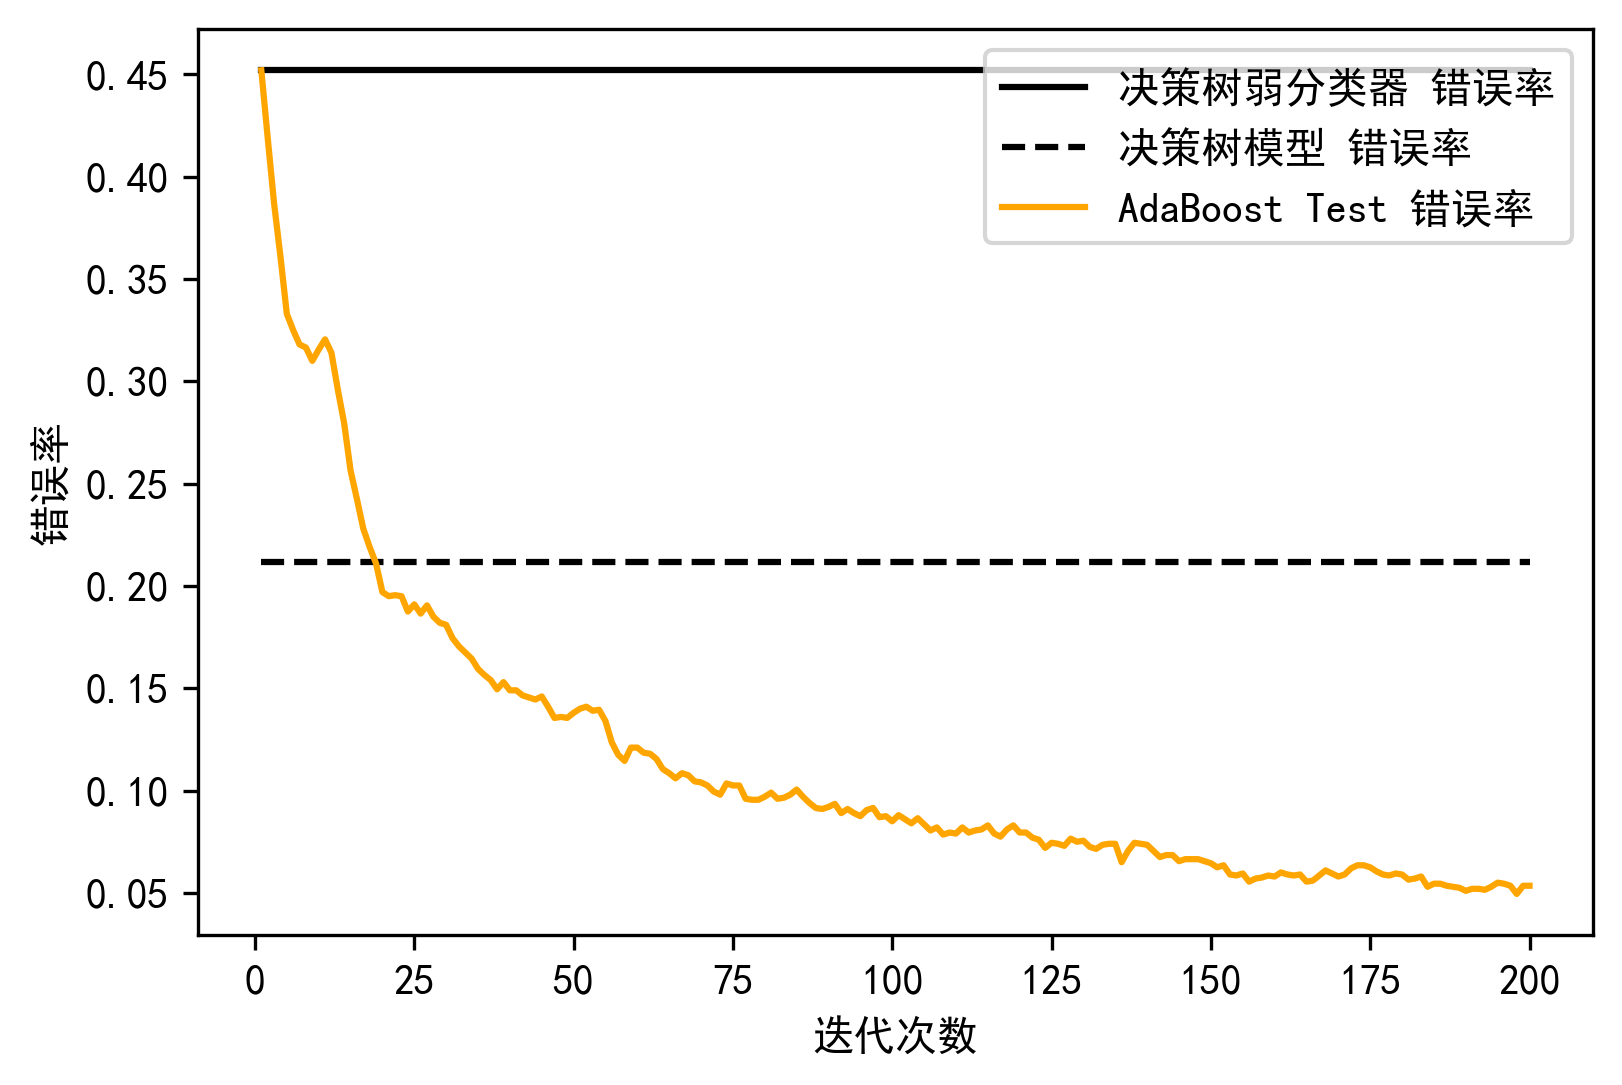

In [8]:
# 三个分类器的错误率可视化
fig = plt.figure(dpi=300)
# 设置plt正确显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']
ax = fig.add_subplot(111)
ax.plot([1, n_estimators], [dt_stump_err] * 2, 'k-', label='决策树弱分类器 错误率')
ax.plot([1, n_estimators], [dt_err] * 2, 'k--', label='决策树模型 错误率')
ada_err = np.zeros((n_estimators,))
# 遍历每次迭代的结果 i为迭代次数， pred_y 为预测结果
for i, pred_y in enumerate(ada.staged_predict(test_x)):
    # 统计错误率
    ada_err[i] = zero_one_loss(pred_y, test_y)
# 绘制每次迭代的AdaBoost错误率 
ax.plot(np.arange(n_estimators) + 1, ada_err, label='AdaBoost Test 错误率', color='orange')
ax.set_xlabel('迭代次数')
ax.set_ylabel('错误率')
leg = ax.legend(loc='upper right', fancybox=True)
plt.show()